# Demo 8: Checkpoint

It is fun to play with KANs, just the same it is fun to play computer games. A common frustration in both games is that one did something wrong but cannot restore to the lastest checkpoint. We provide a quick way to save and load your checkpoint, so that you won't be frustrated and think that you need to start all over again.

save this model to ./model_ckpt/ckpt1


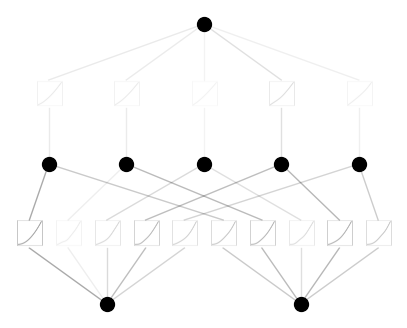

In [1]:
from kan import KAN, create_dataset
import torch
import torch.nn
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, base_fun=torch.nn.SiLU())
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)

model(dataset['train_input'])
model.plot()
model.save_ckpt('ckpt1')
#model.clear_ckpts()
# save intialized model as ckpt1

train loss: 1.57e-01 | test loss: 1.32e-01 | reg: 2.03e+01 : 100%|██| 20/20 [00:10<00:00,  1.82it/s]


save this model to ./model_ckpt/ckpt2


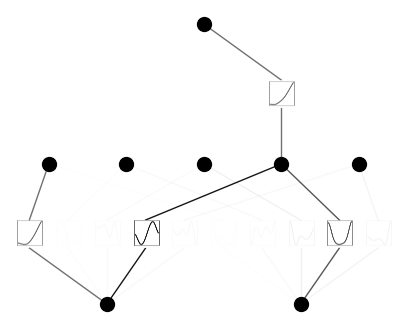

In [2]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model.plot()
model.save_ckpt('ckpt2')
# save the trained model as ckpt2

The above results look promising! You probably want to further simplify it down by further training it or pruning it. Suppose you want to pump up regularization strengh to make the graph cleaner, but you set the strength to be too large and training messes the whole thing up.

train loss: 7.63e+00 | test loss: 6.97e+00 | reg: 2.69e+01 : 100%|██| 20/20 [00:00<00:00, 20.62it/s]


save this model to ./model_ckpt/ckpt3


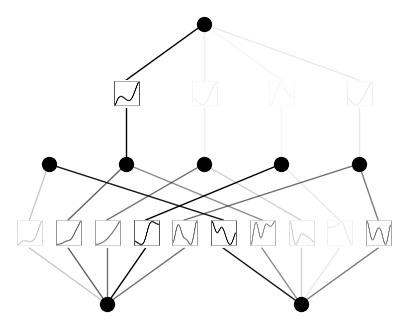

In [3]:
model.train(dataset, opt="Adam", steps=20, lamb=100., lamb_entropy=10.);
model.plot()
model.save_ckpt('ckpt3')

We want to recover to ckpt2

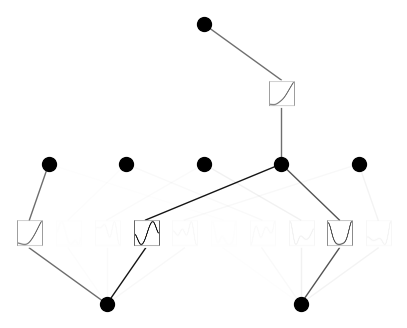

In [4]:
model.load_ckpt('ckpt2')
model(dataset['train_input'])
model.plot()

Now we realize that pruning it seems a better choice.

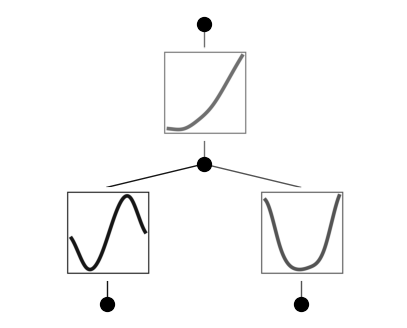

In [5]:
model = model.prune()
model(dataset['train_input'])
model.plot()